<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

<a id='p1'></a>
## I.- Problema 01


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos, denominado `vehiculos_procesado_con_grupos.csv`, contiene algunas de las características más importantes de los vehículos. El objetivo de este ejercicio es clasificar los vehículos en diferentes categorías, basándonos en las características que se describen a continuación. 

El desafío de este ejercicio radica en la combinación de variables numéricas y categóricas, lo que añade complejidad al análisis.

Lo primero que haremos será cargar el conjunto de datos:

**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')  # Cambia 'TkAgg' por 'Agg' o 'Qt5Agg' si 'TkAgg' no funciona
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 

1.

In [4]:


# Seleccionar solo las columnas numéricas
numericas = df.select_dtypes(include='number')

# Rellenar valores nulos con la media
df_procesado = numericas.apply(lambda x: x.fillna(x.mean()))

# Escalar los datos
scaler = MinMaxScaler()
df_procesado = pd.DataFrame(scaler.fit_transform(df_procesado), columns=numericas.columns)

# Verificar si quedan valores nulos
df_procesado.isnull().sum()


year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

2.

In [5]:
from pandas import get_dummies

categoricas = df.select_dtypes(exclude= "number")

categoricas = get_dummies(categoricas)

df_procesado[categoricas.columns] = categoricas


df_procesado[categoricas.columns] = df_procesado[categoricas.columns].astype(int)

df_procesado.isnull().sum()

df_procesado

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [6]:
#1
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_procesado)

#2
centroids = kmeans.cluster_centers_ #centros
clusters = kmeans.labels_ #clusters

predict_df = df_procesado.copy()
predict_df['clusters'] = clusters

grouped = predict_df.groupby(['clusters'])

c:\Users\jqnra\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jqnra\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [7]:
centroids

array([[ 6.48106020e-01,  5.20139774e-01,  3.99412435e-01,
         4.08849267e-01,  3.39357384e-01,  1.06200123e-01,
         2.27133211e-02,  1.01289134e-01,  1.05586249e-01,
         3.73848987e-01,  2.39410681e-01,  3.13075506e-02,
         1.96439533e-02,  3.52363413e-01,  6.47636587e-01,
         8.04788214e-01,  1.95211786e-01,  1.22774708e-03,
         6.13873542e-04,  2.38182934e-01,  7.59975445e-01,
         3.78759975e-01,  1.24002455e-01,  4.82504604e-01,
        -2.49800181e-16,  1.47329650e-02,  8.53898097e-01,
         1.38777878e-16,  1.43646409e-01,  2.45549417e-03,
        -1.11022302e-16,  9.50276243e-01,  5.55111512e-16,
         3.06936771e-03,  4.66543892e-02,  2.49800181e-16],
       [ 5.70251081e-01,  1.69627086e-01,  1.46043218e-01,
         2.40982878e-01,  1.56483424e-01,  7.95684423e-03,
         1.17329737e-01,  1.75320297e-02,  1.39042481e-01,
         6.26837492e-01,  8.19959541e-02,  1.61834120e-03,
         7.68712070e-03,  9.26500337e-02,  9.07349966e-

In [8]:
#3
means = grouped[numericas.columns].mean()
modes = grouped[categoricas.columns].agg(pd.Series.mode)

print("Media de los valores numericos:")
display(means)
print("\n")
print("Moda de los valores categóricos:")
display(modes)

Media de los valores numericos:


,year,desplazamiento,cilindros,co2,consumo_litros_milla
clusters,,,,,
0,0.648106,0.520140,0.399412,0.408849,0.339357
1,0.570251,0.169627,0.146043,0.240983,0.156483
2,0.525716,0.250605,0.195395,0.304307,0.226445
3,0.409557,0.334014,0.258155,0.354170,0.281285
4,0.448187,0.562543,0.404588,0.502541,0.443351
5,0.379537,0.584770,0.430676,0.510985,0.455312
6,0.579872,0.357729,0.296451,0.353457,0.281641
7,0.411168,0.421725,0.296052,0.410099,0.344362




Moda de los valores categóricos:


,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
clusters,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [9]:
n_clusters = [5,10,20,30,50,75,100,200,300]

kmeans = [KMeans(n_clusters = i) for i in n_clusters]

score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


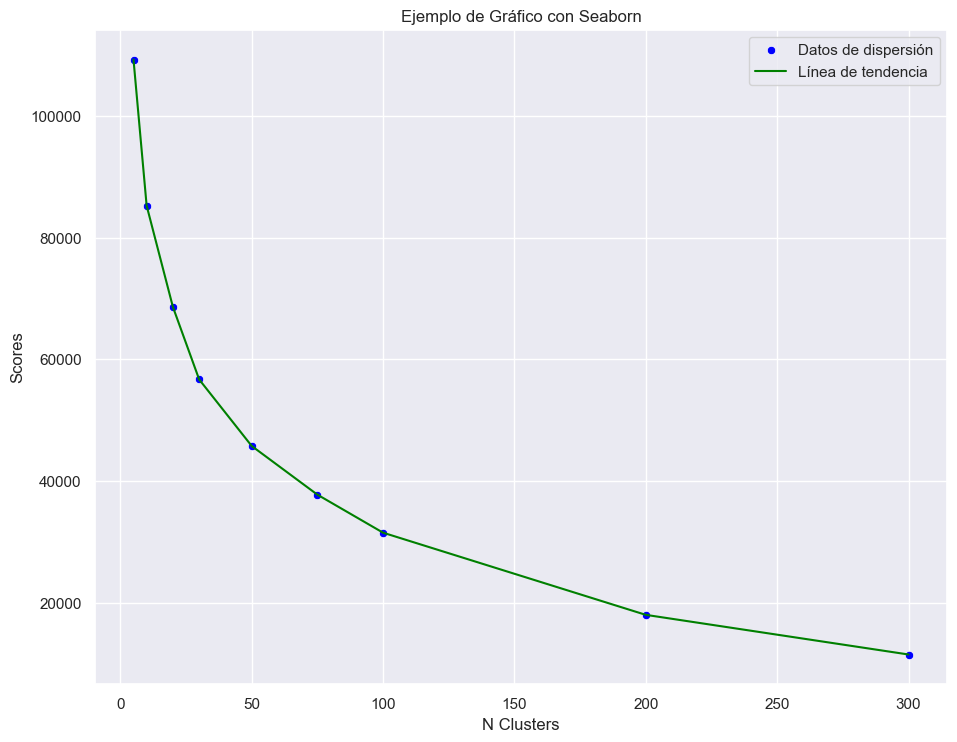

In [16]:
df_scores = pd.DataFrame({'N Clusters':n_clusters,'Scores': score})

# Gráfico de dispersión con seaborn
fig, ax = plt.subplots(figsize=(11, 8.5))
sns.scatterplot(x='N Clusters', y='Scores', data=df_scores, color='blue', label='Datos de dispersión')
sns.lineplot(x='N Clusters', y='Scores', data=df_scores, color='green', label='Línea de tendencia')


# Añadir etiquetas y título
plt.xlabel('N Clusters')
plt.ylabel('Scores')
plt.title('Ejemplo de Gráfico con Seaborn')
plt.show()    # Muestra el gráfico

Utilizando el método del Codo, 50 clusters parece ser un número apropiado.

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 



In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [21]:
from sklearn.preprocessing import StandardScaler

# Separar las características y la etiqueta
X = iris[features]
y = iris[target]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
iris_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
iris_pca['species'] = y

In [26]:
display(iris_pca)

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


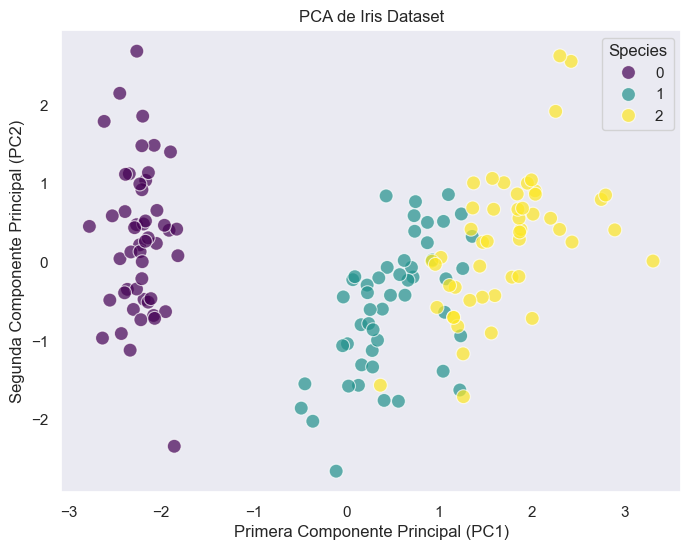

In [24]:
# Visualización de los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_pca, x='PC1', y='PC2', hue='species', palette='viridis', s=100, alpha=0.7)
plt.title('PCA de Iris Dataset')
plt.xlabel('Primera Componente Principal (PC1)')
plt.ylabel('Segunda Componente Principal (PC2)')
plt.legend(title='Species')
plt.grid()
plt.show()

In [25]:
# Explicación de la varianza
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

Varianza explicada por PC1: 0.73
Varianza explicada por PC2: 0.23


In [27]:
# Ver los componentes principales
components = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print(components)

     sepal_length  sepal_width  petal_length  petal_width
PC1      0.521066    -0.269347      0.580413     0.564857
PC2      0.377418     0.923296      0.024492     0.066942
